In [ ]:
## Data Science HW3
### Kushal Chandani (kc07535) 
### kc07535@st.habib.edu.pk

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import random
%matplotlib inline     

In [5]:
#Part 1 of Homework

da = pd.read_csv("loan_small.csv")
da.head(5) 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL


In [7]:
da.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_record     float64
open_acc            

# Renaming and Formating column names

In [10]:
#Making first letter of each column uppercase
da.columns = [x.capitalize() for x in da.columns]

#Renaming specific columns
da.rename(columns={
    'Id': 'ID',
    'Member_id': 'Member_ID',
    'Loan_amnt': 'Loan_amount',
    'Funded_amnt': 'Funded_amount',
    'Funded_amnt_inv': 'Funded_amount_invested',
    'Term': 'Term',
    'Int_rate': 'Interest_rate',
    'Installment': 'Installment',
    'Grade': 'Grade',
    'Sub_grade': 'Sub_grade',
    'Emp_title': 'Employee_title',
    'Emp_length': 'Employee_length',
    'Home_ownership': 'Home_ownership',
    'Annual_inc': 'Annual_income',
    'Verification_status': 'Verification_status',
    'Issue_d': 'Issued',
    'Loan_status': 'Loan_status',
    'Pymnt_plan': 'Payment_plan',
    'Purpose': 'Purpose',
    'Title': 'Title',
    'Zip_code': 'Zip_code',
    'Addr_state': 'Address_state',
    'Dti': 'Debt_to_income_ratio',
    'Delinq_2yrs': 'Delinq_2years',
    'Earliest_cr_line': 'Earliest_credit_line',
    'Inq_last_6mths': 'Inq_last_6months',
    'Mths_since_last_delinq': 'Months_since_last_delinquency',
    'Mths_since_last_record': 'Months_since_last_record',
    'Open_acc': 'Open_accounts',
    'Pub_rec': 'Public_records',
    'Revol_bal': 'Revolving_balance',
    'Revol_util': 'Revolving_utilization',
    'Total_acc': 'Total_accounts',
    'Initial_list_status': 'Initial_list_status',
    'Out_prncp': 'Outstanding_principal',
    'Out_prncp_inv': 'Outstanding_principal_invested',
    'Total_pymnt': 'Total_payment',
    'Total_pymnt_inv': 'Total_payment_invested',
    'Total_rec_prncp': 'Total_received_principal',
    'Total_rec_int': 'Total_received_interest',
    'Total_rec_late_fee': 'Total_received_late_fee',
    'Recoveries': 'Recoveries',
    'Collection_recovery_fee': 'Collection_recovery_fee',
    'Last_pymnt_d': 'Last_payment_date',
    'Last_pymnt_amnt': 'Last_payment_amount',
    'Last_credit_pull_d': 'Last_credit_pull_date',
    'Application_type': 'Application_type'
}, inplace=True)

da

,ID,Member_ID,Loan_amount,Funded_amount,Funded_amount_invested,Term,Interest_rate,Installment,Grade,Sub_grade,...,Total_payment_invested,Total_received_principal,Total_received_interest,Total_received_late_fee,Recoveries,Collection_recovery_fee,Last_payment_date,Last_payment_amount,Last_credit_pull_date,Application_type
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1057818,1289186,7000,7000,7000.00000,36 months,8.90,222.28,A,A5,...,8000.34,7000.00,1000.34,0.00,0.00,0.00,Dec-14,229.64,Dec-14,INDIVIDUAL
995,1057629,1289394,2425,2425,2425.00000,36 months,15.27,84.39,C,C4,...,3052.79,2424.99,612.80,15.00,0.00,0.00,Jan-15,16.06,Jul-15,INDIVIDUAL
996,1057621,1289385,6950,6950,6950.00000,36 months,9.91,223.97,B,B1,...,7349.48,6950.01,399.47,0.00,0.00,0.00,Sep-12,1560.92,Apr-14,INDIVIDUAL
997,1057787,1289153,12375,12375,12344.46478,36 months,9.91,398.79,B,B1,...,13399.63,12375.01,1058.95,0.00,0.00,0.00,Dec-12,9056.48,Jan-16,INDIVIDUAL


# Checking Total Records

In [13]:
da.shape

(999, 47)

In [15]:
da.count() 

ID                                999
Member_ID                         999
Loan_amount                       999
Funded_amount                     999
Funded_amount_invested            999
Term                              999
Interest_rate                     999
Installment                       999
Grade                             999
Sub_grade                         999
Employee_title                    948
Employee_length                   982
Home_ownership                    999
Annual_income                     999
Verification_status               999
Issued                            999
Loan_status                       999
Payment_plan                      999
Purpose                           999
Title                             999
Zip_code                          999
Address_state                     999
Debt_to_income_ratio              999
Delinq_2years                     999
Earliest_credit_line              999
Inq_last_6months                  999
Months_since

# Checking Duplicates

In [18]:
duplicate_rows_da = da[da.duplicated()]
print("number of duplicate rows: ", duplicate_rows_da.shape)

number of duplicate rows:  (0, 47)


In [20]:
sum(da.duplicated())

0

In [22]:
da2 = sum(da.columns.duplicated())
da2

0

In [24]:
da2.shape

()

In [26]:
da

,ID,Member_ID,Loan_amount,Funded_amount,Funded_amount_invested,Term,Interest_rate,Installment,Grade,Sub_grade,...,Total_payment_invested,Total_received_principal,Total_received_interest,Total_received_late_fee,Recoveries,Collection_recovery_fee,Last_payment_date,Last_payment_amount,Last_credit_pull_date,Application_type
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1057818,1289186,7000,7000,7000.00000,36 months,8.90,222.28,A,A5,...,8000.34,7000.00,1000.34,0.00,0.00,0.00,Dec-14,229.64,Dec-14,INDIVIDUAL
995,1057629,1289394,2425,2425,2425.00000,36 months,15.27,84.39,C,C4,...,3052.79,2424.99,612.80,15.00,0.00,0.00,Jan-15,16.06,Jul-15,INDIVIDUAL
996,1057621,1289385,6950,6950,6950.00000,36 months,9.91,223.97,B,B1,...,7349.48,6950.01,399.47,0.00,0.00,0.00,Sep-12,1560.92,Apr-14,INDIVIDUAL
997,1057787,1289153,12375,12375,12344.46478,36 months,9.91,398.79,B,B1,...,13399.63,12375.01,1058.95,0.00,0.00,0.00,Dec-12,9056.48,Jan-16,INDIVIDUAL


# Fixing Error in the Months columns

In [29]:
#removing the word months
da['Term'] = da['Term'].str.replace(' months', '').astype(int)

da

,ID,Member_ID,Loan_amount,Funded_amount,Funded_amount_invested,Term,Interest_rate,Installment,Grade,Sub_grade,...,Total_payment_invested,Total_received_principal,Total_received_interest,Total_received_late_fee,Recoveries,Collection_recovery_fee,Last_payment_date,Last_payment_amount,Last_credit_pull_date,Application_type
0,1077501,1296599,5000,5000,4975.00000,36,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.00000,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.00000,36,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.00000,36,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.00000,60,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1057818,1289186,7000,7000,7000.00000,36,8.90,222.28,A,A5,...,8000.34,7000.00,1000.34,0.00,0.00,0.00,Dec-14,229.64,Dec-14,INDIVIDUAL
995,1057629,1289394,2425,2425,2425.00000,36,15.27,84.39,C,C4,...,3052.79,2424.99,612.80,15.00,0.00,0.00,Jan-15,16.06,Jul-15,INDIVIDUAL
996,1057621,1289385,6950,6950,6950.00000,36,9.91,223.97,B,B1,...,7349.48,6950.01,399.47,0.00,0.00,0.00,Sep-12,1560.92,Apr-14,INDIVIDUAL
997,1057787,1289153,12375,12375,12344.46478,36,9.91,398.79,B,B1,...,13399.63,12375.01,1058.95,0.00,0.00,0.00,Dec-12,9056.48,Jan-16,INDIVIDUAL


## Checking for null values before fixing Employee Length

In [32]:
da.isnull().sum()

ID                                  0
Member_ID                           0
Loan_amount                         0
Funded_amount                       0
Funded_amount_invested              0
Term                                0
Interest_rate                       0
Installment                         0
Grade                               0
Sub_grade                           0
Employee_title                     51
Employee_length                    17
Home_ownership                      0
Annual_income                       0
Verification_status                 0
Issued                              0
Loan_status                         0
Payment_plan                        0
Purpose                             0
Title                               0
Zip_code                            0
Address_state                       0
Debt_to_income_ratio                0
Delinq_2years                       0
Earliest_credit_line                0
Inq_last_6months                    0
Months_since

In [34]:
da.to_csv('Check1.csv', index = False)

In [52]:
#Dropping null values
da = da.dropna(subset=['Employee_title', 'Employee_length', 'Last_payment_date'])

#Dropping tables that don't have any values as well as dropping null values from the few table
#da = da.drop(['Months_since_last_delinquency', 'Months_since_last_record'], axis=1)

da.isnull().sum()

ID                                0
Member_ID                         0
Loan_amount                       0
Funded_amount                     0
Funded_amount_invested            0
Term                              0
Interest_rate                     0
Installment                       0
Grade                             0
Sub_grade                         0
Employee_title                    0
Employee_length                   0
Home_ownership                    0
Annual_income                     0
Verification_status               0
Issued                            0
Loan_status                       0
Payment_plan                      0
Purpose                           0
Title                             0
Zip_code                          0
Address_state                     0
Debt_to_income_ratio              0
Delinq_2years                     0
Earliest_credit_line              0
Inq_last_6months                  0
Open_accounts                     0
Public_records              

## Fixing Employee Length

In [60]:
#Assigning a value in the Employee_length column
#da['Employee_length'] = da['Employee_length'].replace(['10+ years'], '20')
#da['Employee_length'] = da['Employee_length'].replace(['< 1 year'], '0')

#Extracting the numeric values from the Employee_length column and convert them to integers
#da['Employee_length'] = da['Employee_length'].str.extract('(\d+)').astype(int)

print(da['Employee_length'])

1       0
3      20
4       1
5       3
6       8
       ..
994     5
995     3
996     2
997    20
998    20
Name: Employee_length, Length: 947, dtype: int64


In [56]:
da.to_csv('Check4.csv', index = False)

## Fixing loan status column

In [67]:
#checking the total values that are unique in the loan status column

da['Loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current', 'Default',
       'Late (31-120 days)'], dtype=object)

In [73]:
#Defining a dictionary for Loan_status values
status_replace = {
    'Fully Paid': 'Very Good',
    'Current': 'Average',
    'Charged Off': 'Bad',
    'Late (31-120 days)': 'Bad',
    'Default': 'Very Bad'
    
}

#Replace values in the Loan_status column using the status_replace dictionary
da['Loan_status'] = da['Loan_status'].replace(status_replace)

da['Loan_status']

1            Bad
3      Very Good
4        Average
5      Very Good
6        Average
         ...    
994    Very Good
995    Very Good
996    Very Good
997    Very Good
998      Average
Name: Loan_status, Length: 947, dtype: object

In [76]:
da.to_csv('Cleaned_loan_small.csv', index = False)

## Part 2 of Homework

In [9]:
da2 = pd.read_csv('Cleaned_loan_small.csv')
da2

,ID,Member_ID,Loan_amount,Funded_amount,Funded_amount_invested,Term,Interest_rate,Installment,Grade,Sub_grade,...,Total_payment_invested,Total_received_principal,Total_received_interest,Total_received_late_fee,Recoveries,Collection_recovery_fee,Last_payment_date,Last_payment_amount,Last_credit_pull_date,Application_type
0,1077430,1314167,2500,2500,2500.00000,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
1,1076863,1277178,10000,10000,10000.00000,36,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
2,1075358,1311748,3000,3000,3000.00000,60,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL
3,1075269,1311441,5000,5000,5000.00000,36,7.90,156.46,A,A4,...,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,Sep-15,INDIVIDUAL
4,1069639,1304742,7000,7000,7000.00000,60,15.96,170.08,C,C5,...,8136.84,5110.85,3025.99,0.00,0.00,0.00,Jan-16,170.08,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,1057818,1289186,7000,7000,7000.00000,36,8.90,222.28,A,A5,...,8000.34,7000.00,1000.34,0.00,0.00,0.00,Dec-14,229.64,Dec-14,INDIVIDUAL
943,1057629,1289394,2425,2425,2425.00000,36,15.27,84.39,C,C4,...,3052.79,2424.99,612.80,15.00,0.00,0.00,Jan-15,16.06,Jul-15,INDIVIDUAL
944,1057621,1289385,6950,6950,6950.00000,36,9.91,223.97,B,B1,...,7349.48,6950.01,399.47,0.00,0.00,0.00,Sep-12,1560.92,Apr-14,INDIVIDUAL
945,1057787,1289153,12375,12375,12344.46478,36,9.91,398.79,B,B1,...,13399.63,12375.01,1058.95,0.00,0.00,0.00,Dec-12,9056.48,Jan-16,INDIVIDUAL


In [19]:
#Summary of loan amount using loan status

summary = da2.groupby('Loan_status')['Loan_amount'].describe()
print(summary)

#The table reveals that the majority of loans are categorized as either "Very Good" or "Average" suggesting that most have been repaid on time or with minor delays. For customers with these statuses, the bank's loan amounts ranged from $1,000 to $35,000. 

             count          mean          std      min      25%      50%  \
Loan_status                                                                
Average       85.0  17437.647059  8221.403020   3000.0  12000.0  16100.0   
Bad          168.0  13219.345238  7432.093631   1200.0   8000.0  12000.0   
Very Bad       1.0  18000.000000          NaN  18000.0  18000.0  18000.0   
Very Good    693.0  12234.379509  7170.439507   1000.0   7000.0  10200.0   

                 75%      max  
Loan_status                    
Average      22000.0  35000.0  
Bad          17012.5  35000.0  
Very Bad     18000.0  18000.0  
Very Good    15000.0  35000.0  


In [32]:
da2[['Loan_amount','Funded_amount','Funded_amount_invested', 'Interest_rate']].describe()

#The data summarizes loan-related information for 947 observations. On average, the loan amount, funded amount, and funded 
#amount invested are approximately $12,882, $12,364, and $12,308, respectively, with an average interest rate of approximately 
#12.99%. Loan amounts vary from a minimum of $1,000 to a maximum of $35,000, with a typical range between $7,200 and $16,500, 
#and interest rates ranging from 6.03% to 23.91%.


,Loan_amount,Funded_amount,Funded_amount_invested,Interest_rate
count,947.000000,947.000000,947.000000,947.000000
mean,12882.233369,12363.542767,12307.713136,12.993369
std,7455.397090,6776.767511,6716.162536,3.888809
min,1000.000000,1000.000000,1000.000000,6.030000
25%,7200.000000,7200.000000,7200.000000,9.910000
50%,12000.000000,11300.000000,11200.000000,12.690000
75%,16500.000000,16000.000000,15975.000000,15.960000
max,35000.000000,35000.000000,35000.000000,23.910000


In [40]:
da2.groupby(['Grade', 'Sub_grade', 'Loan_status'])['Loan_amount'].describe()

#The data presents loan amount statistics across different loan grades, sub-grades, and loan statuses. For Grade A1 loans 
#with a Very Good status, the average loan amount is approximately $7,288, with a range from $3,000 to $17,000. 
#Grade A2 loans in the Bad category are represented by a single observation with a loan amount of $11,100. Meanwhile, 
#Grade A2 loans with a Very Good status have an average loan amount of around $10,609, varying between $3,600 and $32,000.
#These insights offer a concise overview of loan amounts within this dataset.

count          mean          std      min  \
Grade Sub_grade Loan_status                                              
A     A1        Very Good     26.0   7288.461538  3426.289763   3000.0   
      A2        Bad            1.0  11100.000000          NaN  11100.0   
                Very Good     24.0  10609.375000  5768.546707   3600.0   
      A3        Bad            4.0   9618.750000  1992.211397   7125.0   
                Very Good     25.0   9807.000000  4789.069151   3000.0   
...                            ...           ...          ...      ...   
F     F5        Very Good      1.0   8075.000000          NaN   8075.0   
G     G1        Bad            1.0  22400.000000          NaN  22400.0   
      G2        Bad            1.0  12375.000000          NaN  12375.0   
      G3        Average        1.0  13000.000000          NaN  13000.0   
      G4        Very Good      2.0  24587.500000   477.297077  24250.0   

                                  25%      50%       75%      max  
Grade Sub_grade Loan_status                                        
A     A1        Very Good     4850.00   6700.0   9025.00  17000.0  
      A2        Bad          11100.00  11100.0  11100.00  11100.0  
                Very Good     8350.00  10000.0  12000.00  32000.0  
      A3        Bad           8981.25   9675.0  10312.50  12000.0  
                Very Good     7000.00   9600.0  12000.00  26000.0  
...                               ...      ...       ...      ...  
F     F5        Very Good     8075.00   8075.0   8075.00   8075.0  
G     G1        Bad          22400.00  22400.0  22400.00  22400.0  
      G2        Bad          12375.00  12375.0  12375.00  12375.0  
      G3        Average      13000.00  13000.0  13000.00  13000.0  
      G4        Very Good    24418.75  24587.5  24756.25  24925.0  

[84 rows x 8 columns]

# Exploratory Data Analysis

## Univariate Analysis

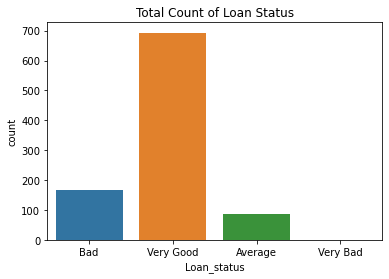

In [55]:
#1. Bar charts
#Analysis of Loan_status

sns.countplot(x='Loan_status', data=da2)
plt.title('Total Count of Loan Status')
plt.show()

#The chart below illustrates that the majority of customers have loan statuses categorized as "very good" or "average." This positive trend indicates that the bank's loans are being repaid on schedule or with only minor delays, reflecting well on the bank's lending practices.

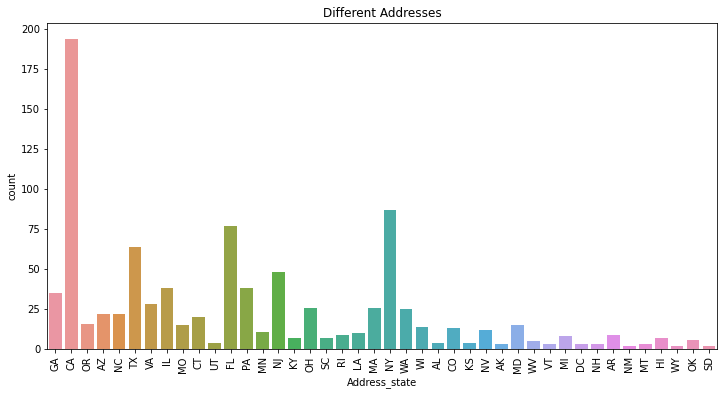

In [78]:
#

plt.figure(figsize=(12, 6))  #increasing the figure size to the desired dimensions
sns.countplot(x='Address_state', data=da2)
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.title('Different Addresses')
plt.show()

#The chart below shows that most of the loans were take in the state of CA then NY and then FL and it also shows how scattered the data is across different states.

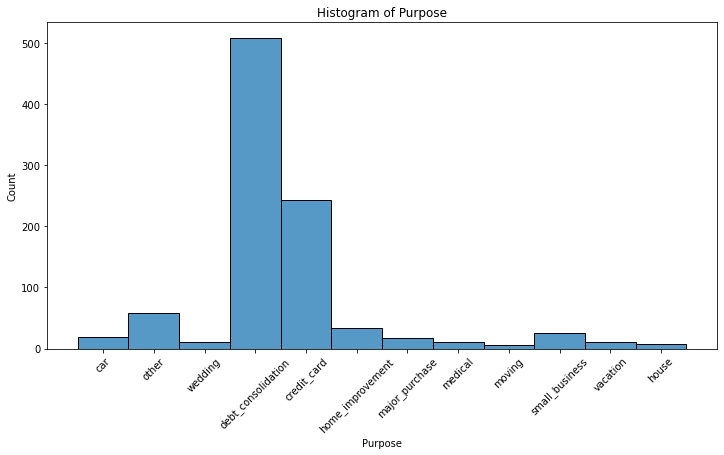

In [87]:
#2. Historgrams 1

plt.figure(figsize=(12, 6))  #increasing the figure size to the desired dimensions
sns.histplot(da2['Purpose'], kde=False, bins=10)
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.title('Histogram of Purpose')
plt.show()

#The graph offers valuable insights into the reasons behind people taking out loans. Predominantly, individuals seek loans for purposes such as debt consolidation, credit card payments, home improvements, and major purchases. This pattern underscores that the majority of borrowers are utilizing loans for personal needs rather than business ventures. However, it's worth noting that there are also a few individuals who have borrowed for small business-related purposes and similar ventures.

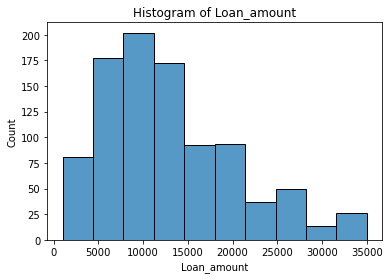

In [93]:
#2. Historgrams 2

sns.histplot(da2['Loan_amount'], kde=False, bins=10)
#plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.title('Histogram of Loan_amount')
plt.show()

# The graph illustrates how loan amounts are distributed. The majority of loans fall within the range of 5,000 to 15,000, while there are notably fewer loans exceeding 20,000. This pattern suggests that most individuals opt for smaller loan amounts, which they can comfortably repay, rather than taking on larger loans that may pose challenges in repayment.

In [ ]:
## Visualizations for Bivariate analysis

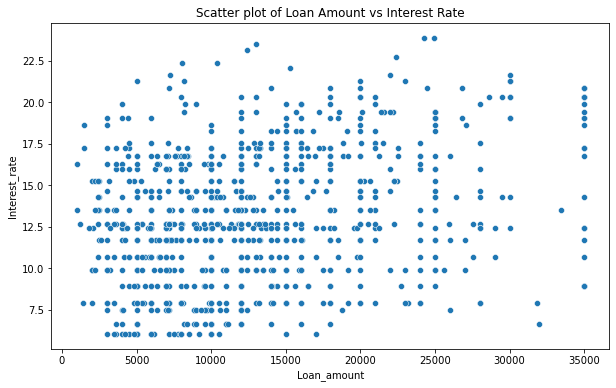

In [98]:
#Continuous vs Continuous plot 1

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Loan_amount', y='Interest_rate', data=da2)
plt.title('Scatter plot of Loan Amount vs Interest Rate')
plt.show()

# The scatter plot above reveals a noticeable positive association between loan amounts and funded amounts, suggesting that when one increases, the other tends to follow suit. Nevertheless, this correlation is relatively weak, indicating substantial variability in the data and a less pronounced relationship. Additionally, the majority of data points cluster in the lower-left section of the graph, indicating that a significant portion of loans corresponds to both modest loan amounts and low interest rates.

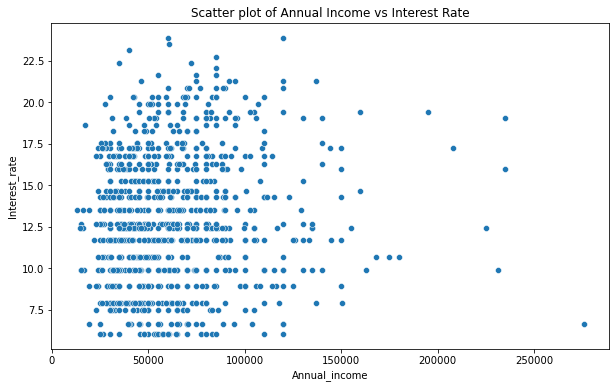

In [132]:
#Continuous vs Continuous plot 2

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_income', y='Interest_rate', data=da2)
plt.title('Scatter plot of Annual Income vs Interest Rate')
plt.show()

#The scatter plot shows the relationship between annual income and interest rate. The data shows a negative correlation between the two variables, meaning that as annual income increases, interest rate tends to decrease. This is likely because lenders perceive borrowers with higher incomes to be less risky, and therefore charge them lower interest rates.

#The scatter plot also shows a lot of variation in the data, with some borrowers with high incomes paying relatively high interest rates, and some borrowers with low incomes paying relatively low interest rates. This is likely due to a number of factors, such as the borrower's credit score, debt-to-income ratio, and the type of loan they are applying for.

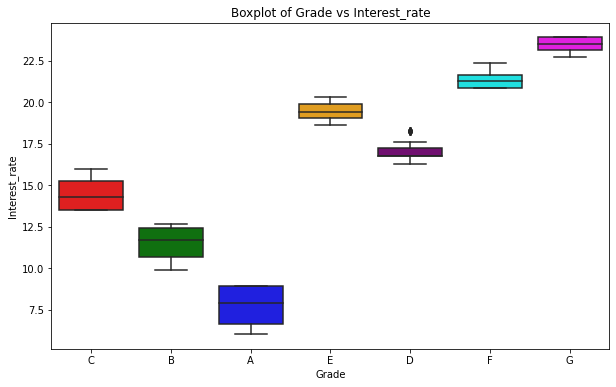

In [102]:
#Discrete vs Continuous 1

plt.figure(figsize=(10,6))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']
sns.boxplot(data =da2, x='Grade', y='Interest_rate',palette=colors)
plt.title('Boxplot of Grade vs Interest_rate')
plt.show()

#The box plots show that among the categories, Category G exhibits the highest interest rate, whereas Category A has the lowest interest rate.

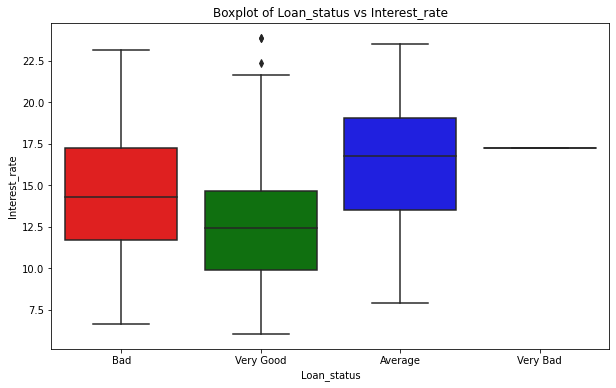

In [127]:
#Discrete vs Continuous 2

plt.figure(figsize=(10,6))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']
sns.boxplot(data =da2, x='Loan_status', y='Interest_rate',palette=colors)
plt.title('Boxplot of Loan_status vs Interest_rate')
plt.show()

#It shows that The median interest rate is highest for loans with a status of "Very bad" and lowest for loans with a status of "Very good". The interquartile range is also wider for loans with a status of "Very bad", indicating that there is more variation in interest rates for these loans. There are more outliers for loans with a status of "Very bad" and "Bad", suggesting that there are a few loans with very high interest rates.

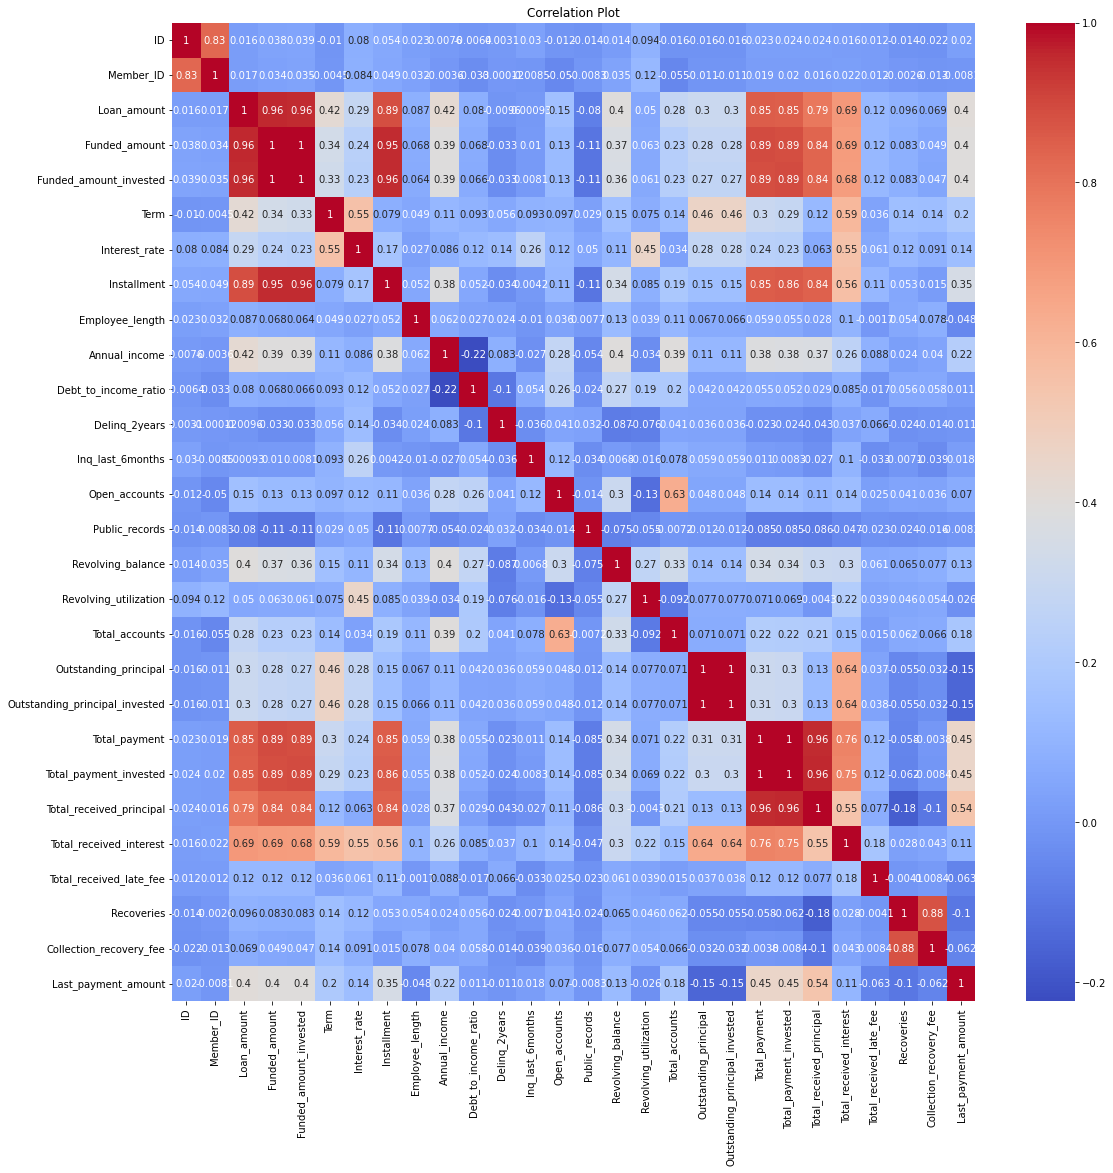

In [112]:
#Correlation plot

numeric_columns = da2.select_dtypes(include=['number'])

# Create the correlation plot with increased figure size and a different color map
plt.figure(figsize=(18, 18))
sns.heatmap(numeric_columns.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Plot')
plt.show()

#The strong positive correlations, represented by dark red shades, signify that when one variable increases, the other tends to increase as well. For instance, there's a positive correlation between installment amounts and total payments, which makes sense because higher installments naturally lead to higher total payments.

#Conversely, the negative correlations, indicated by dark Blue colors, suggest that as one variable decreases, the other tends to increase. For instance, there's a negative correlation between Dti (debt-to-income ratio) and annual income, which is logical since higher annual income often corresponds to a lower Dti.

#When correlations are close to 0, lighter colour like white, it implies there's no discernible trend or relationship between the variables.

# Multivariate Analysis

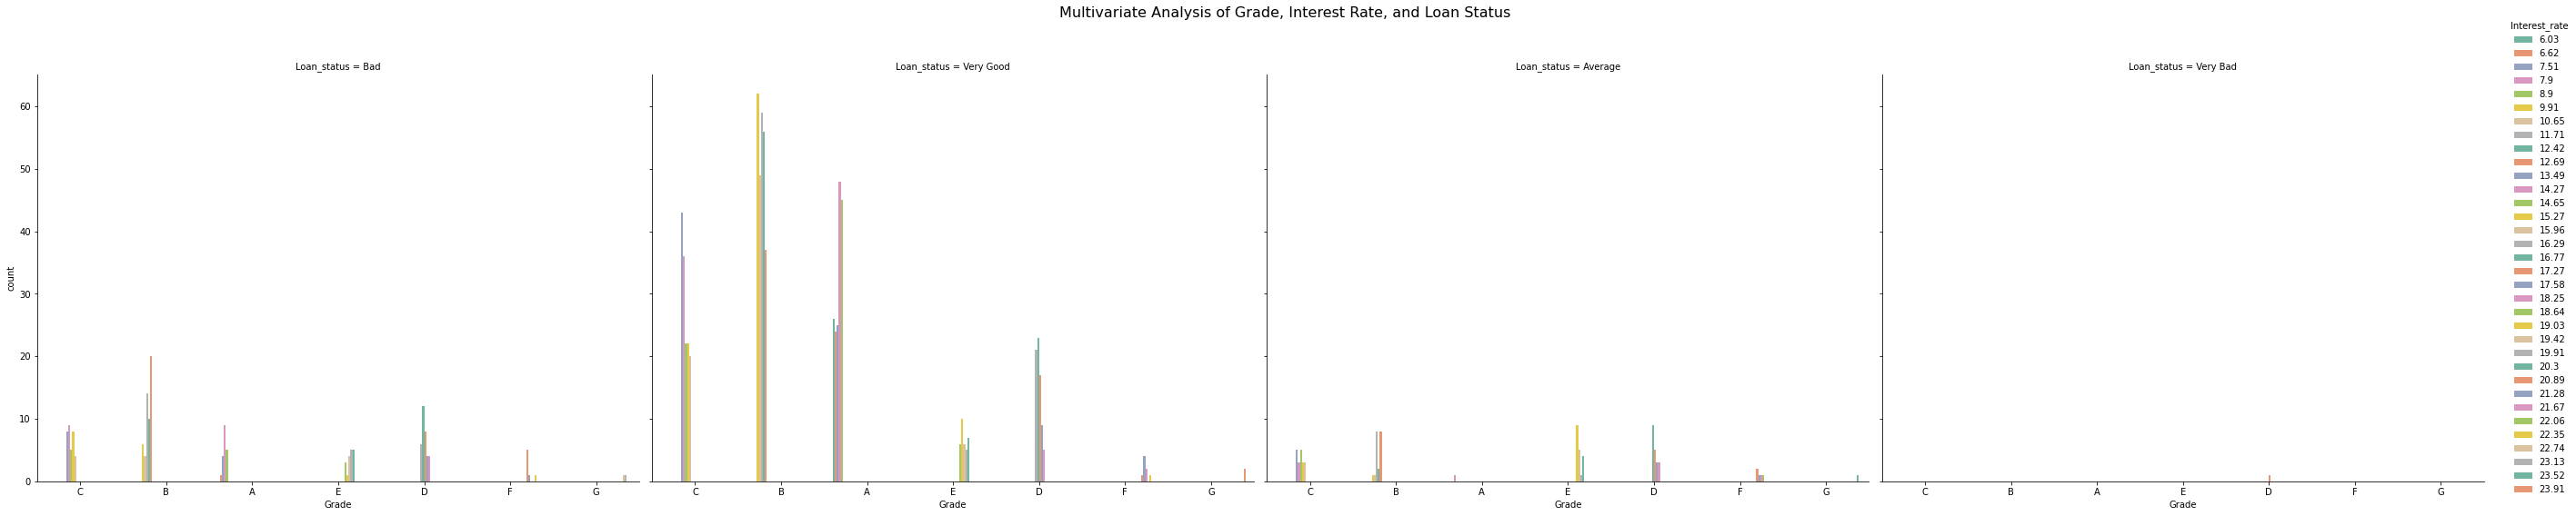

In [116]:
custom_palette = sns.color_palette("Set2")
g = sns.catplot(x="Grade", hue="Interest_rate", col="Loan_status", data=da2, kind="count", height=8, aspect=1.2, palette=custom_palette)
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Multivariate Analysis of Grade, Interest Rate, and Loan Status', fontsize=16)
plt.show() 

#The cat plot, which examines the relationship between grade, interest rate, and loan status, reveals several notable trends. Firstly, individuals with higher grades (A, B, C) tend to enjoy lower interest rates and typically exhibit a "Very Good" loan status. This observation aligns with the expectation that those with higher-grade classifications often boast higher annual incomes, enabling them to repay loans on time or with minimal delays.

#Conversely, those with lower grades (E, F, G, H) generally face higher interest rates and tend to have either a "Very Bad," "Bad," or "Average" loan status. This outcome is consistent with the assumption that individuals with lower-grade classifications typically have lower annual incomes, which can present challenges when it comes to timely loan repayment. Additionally, lower-grade individuals may have other factors impacting their loan status, such as financial constraints or credit history.